<a href="https://colab.research.google.com/github/YonggunJung/Project1-KOSPI/blob/main/123_%EC%BD%94%EC%8A%A4%ED%94%BC_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84_%EC%A0%84%EC%B2%B4_%EB%85%84%EB%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 기본 임포트
import pandas as pd
import numpy as np
# 시각화를 위한 임포트
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil

import re

import surprise

# 시간 측정을 위한 모듈
import datetime

# 경고 뜨지 않게..
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'Apple Gothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False



In [ ]:
# 코스피 전처리  불러오기
df20 = pd.read_csv('./data//make/코스피전처리.csv', encoding='utf-8-sig')
df20

,일자,오픈,종가,거래량
0,1981-05,121.766667,121.766667,1.447792e+06
1,1981-06,137.104000,137.104000,2.314800e+06
2,1981-07,154.842308,154.842308,1.578923e+06
3,1981-08,145.368000,145.368000,8.250400e+05
4,1981-09,141.528000,141.528000,7.726800e+05
...,...,...,...,...
491,2022-04,2703.242857,2700.210000,9.540277e+08
492,2022-05,2628.338571,2628.356190,8.030019e+08
493,2022-06,2474.948500,2487.598500,6.007340e+08
494,2022-07,2362.794762,2363.606190,3.788405e+08


In [ ]:
# 종가 컬럼명 코스피로 변환
df20.rename(columns = {'종가' : '코스피'}, inplace=True)
df20

,일자,오픈,코스피,거래량
0,1981-05,121.766667,121.766667,1.447792e+06
1,1981-06,137.104000,137.104000,2.314800e+06
2,1981-07,154.842308,154.842308,1.578923e+06
3,1981-08,145.368000,145.368000,8.250400e+05
4,1981-09,141.528000,141.528000,7.726800e+05
...,...,...,...,...
491,2022-04,2703.242857,2700.210000,9.540277e+08
492,2022-05,2628.338571,2628.356190,8.030019e+08
493,2022-06,2474.948500,2487.598500,6.007340e+08
494,2022-07,2362.794762,2363.606190,3.788405e+08


In [ ]:
# 일자 컬럼 시계열 데이터로 변환
df20['일자'] = pd.to_datetime(df20['일자'], format='%Y-%m')

In [ ]:
# 월별 데이터를 월 평균으로 묶어 연도별 데이터로 변환
df21 = df20.groupby(df20['일자'].dt.strftime('%Y')).mean()
df21

,오픈,코스피,거래량
일자,,,
1981,136.310628,136.310628,1.149209e+06
1982,122.236043,122.236043,1.060986e+06
1983,121.703806,121.703806,9.921587e+05
1984,131.877047,131.877047,1.550147e+06
1985,138.929444,138.929444,2.003314e+06
1986,227.783407,227.783407,3.542714e+06
1987,417.545699,417.545699,5.694133e+06
1988,693.141037,693.141037,1.043111e+07
1989,918.596421,918.596421,1.180703e+07


In [ ]:
# 새 인덱스 추가
df21.reset_index(inplace=True)
df21

,일자,오픈,코스피,거래량
0,1981,136.310628,136.310628,1.149209e+06
1,1982,122.236043,122.236043,1.060986e+06
2,1983,121.703806,121.703806,9.921587e+05
3,1984,131.877047,131.877047,1.550147e+06
4,1985,138.929444,138.929444,2.003314e+06
5,1986,227.783407,227.783407,3.542714e+06
6,1987,417.545699,417.545699,5.694133e+06
7,1988,693.141037,693.141037,1.043111e+07
8,1989,918.596421,918.596421,1.180703e+07
9,1990,747.000627,747.000627,1.100659e+07


In [ ]:
# 일자 컬럼 시계열 데이터로 변환
df21['일자'] = pd.to_datetime(df21['일자'], format = '%Y')

In [ ]:
# 불 필요 컬럼 삭제
del df21['오픈'], df21['거래량']

In [ ]:
# 병사 월급 데이터 불러오기
df22 = pd.read_csv('./data/make/병사월급 전처리.csv', encoding='utf-8-sig')
df22

,Unnamed: 0,병장,상병,일병,이병
0,1962,200,180,150,130
1,1965,200,180,150,130
2,1966,400,360,300,260
3,1967,460,410,340,300
4,1968,600,520,440,390
...,...,...,...,...,...
58,2018,405700,366200,331300,306100
59,2019,405700,366200,331300,306100
60,2020,540900,488200,441700,408100
61,2021,608500,549200,496900,459100


In [ ]:
# Unnamed: 0 컬럼명 일자로 변환
df22.rename(columns = {'Unnamed: 0' : '일자'}, inplace=True)
df22

,일자,병장,상병,일병,이병
0,1962,200,180,150,130
1,1965,200,180,150,130
2,1966,400,360,300,260
3,1967,460,410,340,300
4,1968,600,520,440,390
...,...,...,...,...,...
58,2018,405700,366200,331300,306100
59,2019,405700,366200,331300,306100
60,2020,540900,488200,441700,408100
61,2021,608500,549200,496900,459100


In [ ]:
# 일자컬럼 데이터 문자열로 변환
df22['일자']= df22['일자'].astype('str')

In [ ]:
# 일자 컬럼 시계열 데이터로 변환
df22['일자'] = pd.to_datetime(df22['일자'], format = '%Y')

In [ ]:
# 컬럼명 변경
df22.rename(columns = {'이병' : '이병월급'}, inplace=True)
df22

,일자,병장,상병,일병,이병월급
0,1962-01-01,200,180,150,130
1,1965-01-01,200,180,150,130
2,1966-01-01,400,360,300,260
3,1967-01-01,460,410,340,300
4,1968-01-01,600,520,440,390
...,...,...,...,...,...
58,2018-01-01,405700,366200,331300,306100
59,2019-01-01,405700,366200,331300,306100
60,2020-01-01,540900,488200,441700,408100
61,2021-01-01,608500,549200,496900,459100


In [ ]:
# 불팔요 컬럼 삭제
del df22['병장'], df22['상병'], df22['일병']

In [ ]:
# GDPGNI 전처리  불러오기
df23 = pd.read_csv('./data/make/GDPGNI전처리.csv', encoding='utf-8-sig')
df23

,Unnamed: 0,GDP,GNI
0,1981,72933.5,71939.7
1,1982,78349.5,77625.0
2,1983,87760.5,86845.3
3,1984,97511.3,96132.0
4,1985,101296.2,99075.0
5,1986,116836.0,114324.6
6,1987,147949.3,146157.4
7,1988,199592.6,198046.8
8,1989,246928.8,246202.5
9,1990,283365.2,283081.3


In [ ]:
# Unnamed: 0 컬럼명 일자로 변환
df23.rename(columns = {'Unnamed: 0' : '일자'}, inplace=True)
df23

,일자,GDP,GNI
0,1981,72933.5,71939.7
1,1982,78349.5,77625.0
2,1983,87760.5,86845.3
3,1984,97511.3,96132.0
4,1985,101296.2,99075.0
5,1986,116836.0,114324.6
6,1987,147949.3,146157.4
7,1988,199592.6,198046.8
8,1989,246928.8,246202.5
9,1990,283365.2,283081.3


In [ ]:
# 일자 컬럼 데이터 문자열로 변환
df23['일자']= df23['일자'].astype('str')

In [ ]:
# 일자 컬럼 데이터 시계열 데이터로 변환
df23['일자'] = pd.to_datetime(df23['일자'], format='%Y')
df23

,일자,GDP,GNI
0,1981-01-01,72933.5,71939.7
1,1982-01-01,78349.5,77625.0
2,1983-01-01,87760.5,86845.3
3,1984-01-01,97511.3,96132.0
4,1985-01-01,101296.2,99075.0
5,1986-01-01,116836.0,114324.6
6,1987-01-01,147949.3,146157.4
7,1988-01-01,199592.6,198046.8
8,1989-01-01,246928.8,246202.5
9,1990-01-01,283365.2,283081.3


In [ ]:
# 불필요 데이터 삭제
del df23['GNI']

In [ ]:
df24 = pd.read_csv('./data/make/최저임금 전처리.csv', encoding='utf-8-sig')
df24

,Unnamed: 0,시간급
0,1989-01-01,600
1,1990-01-01,690
2,1991-01-01,820
3,1992-01-01,925
4,1993-01-01,1005
5,1994-01-01,1085
6,1995-01-01,1170
7,1996-01-01,1275
8,1997-01-01,1400
9,1998-01-01,1485


In [ ]:
df24.rename(columns = {'Unnamed: 0' : '일자', '시간급' : '최저임금'}, inplace=True)
df24

,일자,최저임금
0,1989-01-01,600
1,1990-01-01,690
2,1991-01-01,820
3,1992-01-01,925
4,1993-01-01,1005
5,1994-01-01,1085
6,1995-01-01,1170
7,1996-01-01,1275
8,1997-01-01,1400
9,1998-01-01,1485


In [ ]:
df24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      34 non-null     object
 1   최저임금    34 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 672.0+ bytes


In [ ]:
df24['일자'] = pd.to_datetime(df24['일자'], format = '%Y-%m')

In [ ]:
# 코스피200 전처리  불러오기
df101 = pd.read_csv('./data//make/코스피200전처리.csv', encoding='utf-8-sig')
df101

,일자,종가,시가,거래량,거래대금,상장시가총액
0,2001-06,74.019333,74.192667,192455.533333,1313.600000,1.864585e+05
1,2001-07,68.338571,68.494286,178518.142857,897.476190,1.735380e+05
2,2001-08,70.088182,69.875909,284889.500000,1125.772727,1.777835e+05
3,2001-09,62.220500,62.240000,416194.900000,1144.400000,1.571637e+05
4,2001-10,64.463500,64.338500,359815.100000,1098.250000,1.625868e+05
...,...,...,...,...,...,...
251,2022-05,347.516190,347.494762,206781.857143,6410.285714,1.786863e+06
252,2022-06,325.868500,327.490000,152451.900000,6653.950000,1.697973e+06
253,2022-07,312.161429,312.319048,115223.619048,5542.904762,1.626708e+06
254,2022-08,324.845455,324.590909,132443.136364,5850.909091,1.707250e+06


In [ ]:
df101['일자'] = pd.to_datetime(df101['일자'], format='%Y-%m')
df101

,일자,종가,시가,거래량,거래대금,상장시가총액
0,2001-06-01,74.019333,74.192667,192455.533333,1313.600000,1.864585e+05
1,2001-07-01,68.338571,68.494286,178518.142857,897.476190,1.735380e+05
2,2001-08-01,70.088182,69.875909,284889.500000,1125.772727,1.777835e+05
3,2001-09-01,62.220500,62.240000,416194.900000,1144.400000,1.571637e+05
4,2001-10-01,64.463500,64.338500,359815.100000,1098.250000,1.625868e+05
...,...,...,...,...,...,...
251,2022-05-01,347.516190,347.494762,206781.857143,6410.285714,1.786863e+06
252,2022-06-01,325.868500,327.490000,152451.900000,6653.950000,1.697973e+06
253,2022-07-01,312.161429,312.319048,115223.619048,5542.904762,1.626708e+06
254,2022-08-01,324.845455,324.590909,132443.136364,5850.909091,1.707250e+06


In [ ]:
df25 = df101.groupby(df101['일자'].dt.strftime('%Y')).mean()
df25

,종가,시가,거래량,거래대금,상장시가총액
일자,,,,,
2001,71.064049,70.985912,348076.384364,1487.537098,1.803425e+05
2002,95.193502,95.236783,577816.243769,2220.196745,2.557437e+05
2003,87.159920,87.170420,236836.819995,1728.532480,2.473268e+05
2004,108.151066,108.211724,149384.880861,1767.902916,3.184188e+05
2005,138.207951,138.094066,144599.999247,2361.779349,4.337260e+05
2006,175.187833,175.273033,105465.813588,2754.073828,5.681317e+05
2007,218.808891,218.800814,109497.086841,4310.721154,7.241038e+05
2008,196.768286,196.994910,125089.559135,4373.648242,6.641823e+05
2009,185.586360,185.557854,167644.829157,4725.687880,6.409331e+05


In [ ]:
df25.reset_index(inplace=True)
df25

,일자,종가,시가,거래량,거래대금,상장시가총액
0,2001,71.064049,70.985912,348076.384364,1487.537098,1.803425e+05
1,2002,95.193502,95.236783,577816.243769,2220.196745,2.557437e+05
2,2003,87.159920,87.170420,236836.819995,1728.532480,2.473268e+05
3,2004,108.151066,108.211724,149384.880861,1767.902916,3.184188e+05
4,2005,138.207951,138.094066,144599.999247,2361.779349,4.337260e+05
5,2006,175.187833,175.273033,105465.813588,2754.073828,5.681317e+05
6,2007,218.808891,218.800814,109497.086841,4310.721154,7.241038e+05
7,2008,196.768286,196.994910,125089.559135,4373.648242,6.641823e+05
8,2009,185.586360,185.557854,167644.829157,4725.687880,6.409331e+05
9,2010,230.176219,230.137306,110546.535724,4572.433228,8.239813e+05


In [ ]:
df25['일자'] = pd.to_datetime(df25['일자'], format = '%Y')

In [ ]:
df25.rename(columns = {'종가' : '코스피200'}, inplace=True)
df25

,일자,코스피200,시가,거래량,거래대금,상장시가총액
0,2001-01-01,71.064049,70.985912,348076.384364,1487.537098,1.803425e+05
1,2002-01-01,95.193502,95.236783,577816.243769,2220.196745,2.557437e+05
2,2003-01-01,87.159920,87.170420,236836.819995,1728.532480,2.473268e+05
3,2004-01-01,108.151066,108.211724,149384.880861,1767.902916,3.184188e+05
4,2005-01-01,138.207951,138.094066,144599.999247,2361.779349,4.337260e+05
5,2006-01-01,175.187833,175.273033,105465.813588,2754.073828,5.681317e+05
6,2007-01-01,218.808891,218.800814,109497.086841,4310.721154,7.241038e+05
7,2008-01-01,196.768286,196.994910,125089.559135,4373.648242,6.641823e+05
8,2009-01-01,185.586360,185.557854,167644.829157,4725.687880,6.409331e+05
9,2010-01-01,230.176219,230.137306,110546.535724,4572.433228,8.239813e+05


In [ ]:
del df25['시가'], df25['거래량'], df25['거래대금'], df25['상장시가총액']

In [ ]:
df102 = pd.read_csv('./data//make/S&P500전처리.csv', encoding='utf-8-sig')
df102

,일자,종가,오픈,변동 %
0,1980-01,114.16,107.94,5.76
1,1980-02,113.66,114.16,-0.44
2,1980-03,102.09,113.66,-10.18
3,1980-04,106.29,102.09,4.11
4,1980-05,111.24,106.29,4.66
...,...,...,...,...
508,2022-05,4132.15,4132.70,0.01
509,2022-06,3785.38,4156.10,-8.39
510,2022-07,4130.29,3779.27,9.11
511,2022-08,3955.00,4103.38,-4.24


In [ ]:
df102.rename(columns = {'종가' : 'S&P500'}, inplace=True)
df102

,일자,S&P500,오픈,변동 %
0,1980-01,114.16,107.94,5.76
1,1980-02,113.66,114.16,-0.44
2,1980-03,102.09,113.66,-10.18
3,1980-04,106.29,102.09,4.11
4,1980-05,111.24,106.29,4.66
...,...,...,...,...
508,2022-05,4132.15,4132.70,0.01
509,2022-06,3785.38,4156.10,-8.39
510,2022-07,4130.29,3779.27,9.11
511,2022-08,3955.00,4103.38,-4.24


In [ ]:
df102['일자'] = pd.to_datetime(df102['일자'], format='%Y-%m')

In [ ]:
df26 = df102.groupby(df102['일자'].dt.strftime('%Y')).mean()
df26

,S&P500,오픈,변동 %
일자,,,
1980,119.578333,117.260000,2.055000
1981,127.842500,128.875833,-0.787500
1982,120.275833,118.732500,1.287500
1983,160.724167,158.706667,1.372500
1984,160.315000,160.120833,0.187500
1985,188.966667,185.291667,2.021667
1986,238.920833,236.222500,1.265833
1987,285.991667,285.451667,0.554167
1988,268.050833,265.497500,1.019167


In [ ]:
df26.reset_index(inplace=True)
df26

,일자,S&P500,오픈,변동 %
0,1980,119.578333,117.260000,2.055000
1,1981,127.842500,128.875833,-0.787500
2,1982,120.275833,118.732500,1.287500
3,1983,160.724167,158.706667,1.372500
4,1984,160.315000,160.120833,0.187500
5,1985,188.966667,185.291667,2.021667
6,1986,238.920833,236.222500,1.265833
7,1987,285.991667,285.451667,0.554167
8,1988,268.050833,265.497500,1.019167
9,1989,326.314167,320.008333,2.086667


In [ ]:
df26['일자'] = pd.to_datetime(df26['일자'], format = '%Y')

In [ ]:
del df26['오픈'], df26['변동 %']

In [ ]:
# 금값 데이터 불러오기
df103 = pd.read_csv('./data/make/금전처리.csv', encoding='utf-8-sig')
df103

,Unnamed: 0,금값
0,1986/01,350.5
1,1986/02,338.15
2,1986/03,344.0
3,1986/04,345.75
4,1986/05,343.2
...,...,...
435,2022/04,"1,896.920"
436,2022/05,"1,837.360"
437,2022/06,"1,807.270"
438,2022/07,"1,765.940"


In [ ]:
# 금값 컬럼 데이터 불필요 문자 삭제 및 데이터 타입 유리수로 변환
df103['금값'] = df103['금값'].str.replace(',', '').astype('float64')
df103

,Unnamed: 0,금값
0,1986/01,350.50
1,1986/02,338.15
2,1986/03,344.00
3,1986/04,345.75
4,1986/05,343.20
...,...,...
435,2022/04,1896.92
436,2022/05,1837.36
437,2022/06,1807.27
438,2022/07,1765.94


In [ ]:
# Unnamed: 0 컬럼명 일자로 변환, 금값 컬럼명 금값(달러) 로 변환
df103.rename(columns = {'Unnamed: 0' : '일자', '금값' : '금값(달러)'}, inplace=True)
df103

,일자,금값(달러)
0,1986/01,350.50
1,1986/02,338.15
2,1986/03,344.00
3,1986/04,345.75
4,1986/05,343.20
...,...,...
435,2022/04,1896.92
436,2022/05,1837.36
437,2022/06,1807.27
438,2022/07,1765.94


In [ ]:
# 일자 컬럼 데이터 시게열 데이터로 변환
df103['일자'] = pd.to_datetime(df103['일자'], format = '%Y-%m')

In [ ]:
# 일자 컬럼 월별 데이터를 연도별 평균으로 변환
df27 = df103.groupby(df103['일자'].dt.strftime('%Y')).mean()
df27

,금값(달러)
일자,
1986,367.145833
1987,449.918333
1988,432.470833
1989,379.654167
1990,382.487500
1991,359.408333
1992,344.012500
1993,364.629167
1994,384.904167


In [ ]:
# 새 인덱스 추가
df27.reset_index(inplace=True)
df27

,일자,금값(달러)
0,1986,367.145833
1,1987,449.918333
2,1988,432.470833
3,1989,379.654167
4,1990,382.487500
5,1991,359.408333
6,1992,344.012500
7,1993,364.629167
8,1994,384.904167
9,1995,383.904167


In [ ]:
# 일자 컬럼 시계열 데이터로 변환
df27['일자'] = pd.to_datetime(df27['일자'], format = '%Y')

In [ ]:
df104 = pd.read_csv('./data/make/나스닥전처리.csv', encoding='utf-8-sig')
df104

,일자,오픈,종가,거래량
0,1984-12,246.199997,247.100006,8.012000e+07
1,1985-01,260.054546,260.845456,8.100273e+07
2,1985-02,285.236842,285.521052,9.172895e+07
3,1985-03,280.576188,280.428574,7.672905e+07
4,1985-04,280.947620,280.895238,7.173571e+07
...,...,...,...,...
449,2022-05,11827.222470,11829.729539,5.283224e+09
450,2022-06,11439.348447,11418.919085,5.397364e+09
451,2022-07,11554.086084,11622.631543,4.680970e+09
452,2022-08,12584.320822,12570.260403,4.761787e+09


In [ ]:
df104.rename(columns = {'종가' : '나스닥'}, inplace=True)
df104

,일자,오픈,나스닥,거래량
0,1984-12,246.199997,247.100006,8.012000e+07
1,1985-01,260.054546,260.845456,8.100273e+07
2,1985-02,285.236842,285.521052,9.172895e+07
3,1985-03,280.576188,280.428574,7.672905e+07
4,1985-04,280.947620,280.895238,7.173571e+07
...,...,...,...,...
449,2022-05,11827.222470,11829.729539,5.283224e+09
450,2022-06,11439.348447,11418.919085,5.397364e+09
451,2022-07,11554.086084,11622.631543,4.680970e+09
452,2022-08,12584.320822,12570.260403,4.761787e+09


In [ ]:
df104['일자'] = pd.to_datetime(df104['일자'], format='%Y-%m')

In [ ]:
df28 = df104.groupby(df104['일자'].dt.strftime('%Y')).mean()
df28

,오픈,나스닥,거래량
일자,,,
1984,246.199997,247.100006,8.012000e+07
1985,290.152259,290.320347,8.163452e+07
1986,366.912960,366.920253,1.136629e+08
1987,402.468257,402.489748,1.489677e+08
1988,373.933296,374.203728,1.224428e+08
1989,437.222772,437.449747,1.329029e+08
1990,409.214701,409.212669,1.313011e+08
1991,490.951691,491.564483,1.628562e+08
1992,599.189249,599.487904,1.909381e+08


In [ ]:
df28.reset_index(inplace=True)
df28

,일자,오픈,나스닥,거래량
0,1984,246.199997,247.100006,8.012000e+07
1,1985,290.152259,290.320347,8.163452e+07
2,1986,366.912960,366.920253,1.136629e+08
3,1987,402.468257,402.489748,1.489677e+08
4,1988,373.933296,374.203728,1.224428e+08
5,1989,437.222772,437.449747,1.329029e+08
6,1990,409.214701,409.212669,1.313011e+08
7,1991,490.951691,491.564483,1.628562e+08
8,1992,599.189249,599.487904,1.909381e+08
9,1993,714.622812,714.772927,2.631118e+08


In [ ]:
df28['일자'] = pd.to_datetime(df28['일자'], format = '%Y')

In [ ]:
del df28['오픈'], df28['거래량']

In [ ]:
df105 = pd.read_csv('./data/make/넷플릭스전처리.csv', encoding='utf-8-sig')
df105

,일자,오픈,종가,거래량
0,2002-05,1.155833,1.135834,2.464677e+07
1,2002-06,1.050214,1.038071,3.709510e+06
2,2002-07,1.119578,1.110000,3.345936e+06
3,2002-08,0.874805,0.870974,2.949227e+06
4,2002-09,0.843179,0.828071,2.787470e+06
...,...,...,...,...
240,2022-05,185.863333,186.449524,1.198170e+07
241,2022-06,184.890953,184.847620,9.169176e+06
242,2022-07,196.233501,199.089000,1.350418e+07
243,2022-08,232.726522,233.026522,6.619926e+06


In [ ]:
df105.rename(columns = {'종가' : '넷플릭스'}, inplace=True)
df105

,일자,오픈,넷플릭스,거래량
0,2002-05,1.155833,1.135834,2.464677e+07
1,2002-06,1.050214,1.038071,3.709510e+06
2,2002-07,1.119578,1.110000,3.345936e+06
3,2002-08,0.874805,0.870974,2.949227e+06
4,2002-09,0.843179,0.828071,2.787470e+06
...,...,...,...,...
240,2022-05,185.863333,186.449524,1.198170e+07
241,2022-06,184.890953,184.847620,9.169176e+06
242,2022-07,196.233501,199.089000,1.350418e+07
243,2022-08,232.726522,233.026522,6.619926e+06


In [ ]:
df105['일자'] = pd.to_datetime(df105['일자'], format='%Y-%m')

In [ ]:
df29 = df105.groupby(df105['일자'].dt.strftime('%Y')).mean()
df29

,오픈,넷플릭스,거래량
일자,,,
2002,0.884556,0.877457,6.802519e+06
2003,2.059056,2.067440,1.681052e+07
2004,3.448324,3.438026,2.429909e+07
2005,2.587226,2.587118,1.065746e+07
2006,3.697747,3.696442,9.489213e+06
2007,3.127851,3.128026,1.138605e+07
2008,4.085368,4.092768,1.105493e+07
2009,6.289045,6.308781,1.154931e+07
2010,16.645430,16.692568,2.812002e+07


In [ ]:
df29.reset_index(inplace=True)
df29

,일자,오픈,넷플릭스,거래량
0,2002,0.884556,0.877457,6.802519e+06
1,2003,2.059056,2.067440,1.681052e+07
2,2004,3.448324,3.438026,2.429909e+07
3,2005,2.587226,2.587118,1.065746e+07
4,2006,3.697747,3.696442,9.489213e+06
5,2007,3.127851,3.128026,1.138605e+07
6,2008,4.085368,4.092768,1.105493e+07
7,2009,6.289045,6.308781,1.154931e+07
8,2010,16.645430,16.692568,2.812002e+07
9,2011,27.496157,27.493101,4.447222e+07


In [ ]:
df29['일자'] = pd.to_datetime(df29['일자'], format = '%Y')

In [ ]:
del df29['오픈'], df29['거래량']

In [ ]:
df106 = pd.read_csv('./data/make/물가지수전처리.csv', encoding='utf-8-sig')
df106

,Unnamed: 0,물가지수
0,1981/01,45.75
1,1981/02,46.10
2,1981/03,46.55
3,1981/04,47.73
4,1981/05,49.10
...,...,...
494,2022/03,116.70
495,2022/04,118.59
496,2022/05,119.43
497,2022/06,120.10


In [ ]:
df106.rename(columns = {'Unnamed: 0' : '일자'}, inplace=True)
df106

,일자,물가지수
0,1981/01,45.75
1,1981/02,46.10
2,1981/03,46.55
3,1981/04,47.73
4,1981/05,49.10
...,...,...
494,2022/03,116.70
495,2022/04,118.59
496,2022/05,119.43
497,2022/06,120.10


In [ ]:
df106['일자'] = pd.to_datetime(df106['일자'], format = '%Y-%m')

In [ ]:
df30 = df106.groupby(df106['일자'].dt.strftime('%Y')).mean()
df30

,물가지수
일자,
1981,48.744167
1982,51.022500
1983,51.109167
1984,51.480000
1985,51.941667
1986,51.182500
1987,51.412500
1988,52.812500
1989,53.588333


In [ ]:
df30.reset_index(inplace=True)
df30

,일자,물가지수
0,1981,48.744167
1,1982,51.022500
2,1983,51.109167
3,1984,51.480000
4,1985,51.941667
5,1986,51.182500
6,1987,51.412500
7,1988,52.812500
8,1989,53.588333
9,1990,55.828333


In [ ]:
df30['일자'] = pd.to_datetime(df30['일자'], format = '%Y')

In [ ]:
df107 = pd.read_csv('./data/make/상해종합전처리.csv', encoding='utf-8-sig')
df107

,일자,오픈,종가,거래량
0,1997-07,1171.738293,1167.582060,0.000000e+00
1,1997-08,1174.673851,1175.668044,0.000000e+00
2,1997-09,1186.661688,1179.479226,0.000000e+00
3,1997-10,1155.099542,1157.071100,0.000000e+00
4,1997-11,1172.668695,1170.993811,0.000000e+00
...,...,...,...,...
298,2022-05,3078.696842,3090.437898,3.551263e+05
299,2022-06,3279.799049,3295.388079,4.161667e+05
300,2022-07,3310.938093,3305.033331,3.276571e+05
301,2022-08,3242.867835,3243.599981,3.065174e+05


In [ ]:
df107.rename(columns = {'종가' : '상해종합'}, inplace=True)
df107

,일자,오픈,상해종합,거래량
0,1997-07,1171.738293,1167.582060,0.000000e+00
1,1997-08,1174.673851,1175.668044,0.000000e+00
2,1997-09,1186.661688,1179.479226,0.000000e+00
3,1997-10,1155.099542,1157.071100,0.000000e+00
4,1997-11,1172.668695,1170.993811,0.000000e+00
...,...,...,...,...
298,2022-05,3078.696842,3090.437898,3.551263e+05
299,2022-06,3279.799049,3295.388079,4.161667e+05
300,2022-07,3310.938093,3305.033331,3.276571e+05
301,2022-08,3242.867835,3243.599981,3.065174e+05


In [ ]:
df107['일자'] = pd.to_datetime(df107['일자'], format='%Y-%m')

In [ ]:
df31 = df107.groupby(df107['일자'].dt.strftime('%Y')).mean()
df31

,오픈,상해종합,거래량
일자,,,
1997,1169.809105,1168.360473,0.000000e+00
1998,1260.318499,1259.217496,0.000000e+00
1999,1362.907686,1361.728101,0.000000e+00
2000,1868.622098,1869.499341,0.000000e+00
2001,1961.571788,1959.019566,0.000000e+00
2002,1565.051083,1563.388175,0.000000e+00
2003,1467.603240,1468.425187,4.746574e+04
2004,1487.343727,1486.427081,1.515969e+04
2005,1155.875333,1156.039106,1.628833e+04


In [ ]:
df31.reset_index(inplace=True)
df31

,일자,오픈,상해종합,거래량
0,1997,1169.809105,1168.360473,0.000000e+00
1,1998,1260.318499,1259.217496,0.000000e+00
2,1999,1362.907686,1361.728101,0.000000e+00
3,2000,1868.622098,1869.499341,0.000000e+00
4,2001,1961.571788,1959.019566,0.000000e+00
5,2002,1565.051083,1563.388175,0.000000e+00
6,2003,1467.603240,1468.425187,4.746574e+04
7,2004,1487.343727,1486.427081,1.515969e+04
8,2005,1155.875333,1156.039106,1.628833e+04
9,2006,1613.132908,1619.416371,4.268697e+04


In [ ]:
df31['일자'] = pd.to_datetime(df31['일자'], format = '%Y')

In [ ]:
del df31['오픈'], df31['거래량']

In [ ]:
df108 = pd.read_csv('./data/make/주택매매가격전처리.csv', encoding='utf-8-sig')
df108

,Unnamed: 0,주택매매가격지수
0,1986/01,27.682
1,1986/02,27.682
2,1986/03,27.724
3,1986/04,27.516
4,1986/05,27.392
...,...,...
435,2022/04,100.517
436,2022/05,100.768
437,2022/06,100.869
438,2022/07,100.869


In [ ]:
df108.rename(columns = {'Unnamed: 0' : '일자'}, inplace=True)
df108

,일자,주택매매가격지수
0,1986/01,27.682
1,1986/02,27.682
2,1986/03,27.724
3,1986/04,27.516
4,1986/05,27.392
...,...,...
435,2022/04,100.517
436,2022/05,100.768
437,2022/06,100.869
438,2022/07,100.869


In [ ]:
df108['일자'] = pd.to_datetime(df108['일자'], format = '%Y-%m')

In [ ]:
df32 = df108.groupby(df108['일자'].dt.strftime('%Y')).mean()
df32

,주택매매가격지수
일자,
1986,27.329917
1987,27.433417
1988,31.708750
1989,36.187917
1990,42.389917
1991,46.775833
1992,43.726500
1993,42.220917
1994,41.537083


In [ ]:
df32.reset_index(inplace=True)
df32

,일자,주택매매가격지수
0,1986,27.329917
1,1987,27.433417
2,1988,31.708750
3,1989,36.187917
4,1990,42.389917
5,1991,46.775833
6,1992,43.726500
7,1993,42.220917
8,1994,41.537083
9,1995,41.474833


In [ ]:
df32['일자'] = pd.to_datetime(df32['일자'], format = '%Y')

In [ ]:
# 데이터 불러오기
df109 = pd.read_csv('./data/make/지역유형별 신용카드 전처리.csv', encoding='utf-8-sig')
df109

,Unnamed: 0,합계,종합소매,백화점,대형마트/유통전문점,슈퍼마켓,편의점,면세점,전자상거래/통신판매,식료품,...,오락/문화,스포츠/오락/여가,서적/문구,교육,숙박/음식,숙박,음식점,공과금/개인 및 전문 서비스,금융/보험,기타
0,2009-12-01,24338638,4412154,1293161,2191093,692467,74793,160640,2089447,442686,...,1121633,829293,292339,832627,2922757,234682,2688075,1216408,870635,1694977
1,2010-01-01,21112945,3896648,1046319,1970279,666373,70993,142685,1898278,395329,...,931703,681654,250049,773783,2523163,204685,2318478,1272172,775214,1422975
2,2010-02-01,20392319,3894444,910952,2098611,677879,80519,126482,1767115,482663,...,854670,620232,234438,782854,2258609,165533,2093076,1172247,742836,1414682
3,2010-03-01,23524772,4263787,1114037,2205886,707834,79535,156494,2044895,413017,...,1181319,819449,361870,911390,2759929,184830,2575099,1209601,922914,1598574
4,2010-04-01,22218264,3957763,1045405,1984126,701029,77647,149556,1870235,410024,...,1071482,821502,249980,767278,2722885,223252,2499633,1250836,791823,1559754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2022-01-01,54539492,7634707,1604401,3165932,1942293,873099,48982,13162164,1285590,...,1133765,851242,282523,1110997,4435454,262421,4173034,7204997,2243569,3968446
146,2022-02-01,47029608,6265129,1286777,2575148,1565735,792786,44683,11902937,798669,...,1020406,784177,236228,1019333,3690207,243682,3446524,5478483,2130398,3597376
147,2022-03-01,53934645,7178711,1493279,2868236,1811634,956231,49332,13475197,889680,...,1427681,1096302,331379,1128420,4409997,222313,4187684,5924848,2514571,4084527
148,2022-04-01,55138961,7279162,1627246,2873688,1773061,941861,63306,13032409,947790,...,1596543,1329752,266791,1031190,5259467,248080,5011387,5976065,2339679,4197811


In [ ]:
# 컬럼명 변경
df109.rename(columns = {'Unnamed: 0' : '일자', '합계' : '신용카드소비(백만원)'}, inplace=True)
df109

,일자,신용카드소비(백만원),종합소매,백화점,대형마트/유통전문점,슈퍼마켓,편의점,면세점,전자상거래/통신판매,식료품,...,오락/문화,스포츠/오락/여가,서적/문구,교육,숙박/음식,숙박,음식점,공과금/개인 및 전문 서비스,금융/보험,기타
0,2009-12-01,24338638,4412154,1293161,2191093,692467,74793,160640,2089447,442686,...,1121633,829293,292339,832627,2922757,234682,2688075,1216408,870635,1694977
1,2010-01-01,21112945,3896648,1046319,1970279,666373,70993,142685,1898278,395329,...,931703,681654,250049,773783,2523163,204685,2318478,1272172,775214,1422975
2,2010-02-01,20392319,3894444,910952,2098611,677879,80519,126482,1767115,482663,...,854670,620232,234438,782854,2258609,165533,2093076,1172247,742836,1414682
3,2010-03-01,23524772,4263787,1114037,2205886,707834,79535,156494,2044895,413017,...,1181319,819449,361870,911390,2759929,184830,2575099,1209601,922914,1598574
4,2010-04-01,22218264,3957763,1045405,1984126,701029,77647,149556,1870235,410024,...,1071482,821502,249980,767278,2722885,223252,2499633,1250836,791823,1559754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2022-01-01,54539492,7634707,1604401,3165932,1942293,873099,48982,13162164,1285590,...,1133765,851242,282523,1110997,4435454,262421,4173034,7204997,2243569,3968446
146,2022-02-01,47029608,6265129,1286777,2575148,1565735,792786,44683,11902937,798669,...,1020406,784177,236228,1019333,3690207,243682,3446524,5478483,2130398,3597376
147,2022-03-01,53934645,7178711,1493279,2868236,1811634,956231,49332,13475197,889680,...,1427681,1096302,331379,1128420,4409997,222313,4187684,5924848,2514571,4084527
148,2022-04-01,55138961,7279162,1627246,2873688,1773061,941861,63306,13032409,947790,...,1596543,1329752,266791,1031190,5259467,248080,5011387,5976065,2339679,4197811


In [ ]:
# 필요 데이터면 불러오기
df110 = df109.iloc[:, :2]
df110

,일자,신용카드소비(백만원)
0,2009-12-01,24338638
1,2010-01-01,21112945
2,2010-02-01,20392319
3,2010-03-01,23524772
4,2010-04-01,22218264
...,...,...
145,2022-01-01,54539492
146,2022-02-01,47029608
147,2022-03-01,53934645
148,2022-04-01,55138961


In [ ]:
# 일자 컬럼 데이터 시계열 데이터로 변환
df110['일자'] = pd.to_datetime(df110['일자'], format='%Y-%m')

In [ ]:
# 월별 데이터 평균을 연도별로 변환
df33 = df110.groupby(df110['일자'].dt.strftime('%Y')).mean()
df33

,신용카드소비(백만원)
일자,
2009,2.433864e+07
2010,2.336937e+07
2011,2.653594e+07
2012,2.900405e+07
2013,2.989478e+07
2014,3.047580e+07
2015,3.204218e+07
2016,3.485580e+07
2017,3.860529e+07


In [ ]:
# 새 인덱스 추가
df33.reset_index(inplace=True)
df33

,일자,신용카드소비(백만원)
0,2009,2.433864e+07
1,2010,2.336937e+07
2,2011,2.653594e+07
3,2012,2.900405e+07
4,2013,2.989478e+07
5,2014,3.047580e+07
6,2015,3.204218e+07
7,2016,3.485580e+07
8,2017,3.860529e+07
9,2018,4.193815e+07


In [ ]:
# 일자 데이터 시계열로 변경
df33['일자'] = pd.to_datetime(df33['일자'], format = '%Y')

In [ ]:
# 데이터 불러오기
df111 = pd.read_csv('./data/make/통화량전처리.csv', encoding='utf-8-sig')
df111

,Unnamed: 0,통화량(십억원)
0,1986/01,"43,133.6"
1,1986/02,"43,492.4"
2,1986/03,"44,587.1"
3,1986/04,"45,188.7"
4,1986/05,"46,197.5"
...,...,...
433,2022/02,"3,656,135.8"
434,2022/03,"3,672,133.4"
435,2022/04,"3,675,828.7"
436,2022/05,"3,694,489.3"


In [ ]:
# 컬럼명 변경
df111.rename(columns = {'Unnamed: 0' : '일자'}, inplace=True)
df111

,일자,통화량(십억원)
0,1986/01,"43,133.6"
1,1986/02,"43,492.4"
2,1986/03,"44,587.1"
3,1986/04,"45,188.7"
4,1986/05,"46,197.5"
...,...,...
433,2022/02,"3,656,135.8"
434,2022/03,"3,672,133.4"
435,2022/04,"3,675,828.7"
436,2022/05,"3,694,489.3"


In [ ]:
# 통화량(십억원) 컬럼 데이터 불필요 문자 삭제 및 데이터 타입 변경
df111['통화량(십억원)'] = df111['통화량(십억원)'].str.replace(',', '').astype('float64')

In [ ]:
# 일자 컬럼 시계열 데이터로 변환
df111['일자'] = pd.to_datetime(df111['일자'], format = '%Y-%m')

In [ ]:
# 월별 데이터를 연도별 평균으로 바꾸어 연도별 데이터로 변환
df34 = df111.groupby(df111['일자'].dt.strftime('%Y')).mean()
df34

,통화량(십억원)
일자,
1986,4.790641e+04
1987,6.235892e+04
1988,8.193142e+04
1989,1.020779e+05
1990,1.305992e+05
1991,1.607773e+05
1992,1.936041e+05
1993,2.353183e+05
1994,2.824763e+05


In [ ]:
# 새 인덱스 추가
df34.reset_index(inplace=True)
df34

,일자,통화량(십억원)
0,1986,4.790641e+04
1,1987,6.235892e+04
2,1988,8.193142e+04
3,1989,1.020779e+05
4,1990,1.305992e+05
5,1991,1.607773e+05
6,1992,1.936041e+05
7,1993,2.353183e+05
8,1994,2.824763e+05
9,1995,3.382132e+05


In [ ]:
#  일자 컬럼을 시계열 데이터로 추가
df34['일자'] = pd.to_datetime(df34['일자'], format = '%Y')

In [ ]:
# 데이터 불러오기
df112 = pd.read_csv('./data/make/금리전처리.csv', encoding='utf-8-sig')
df112

,Unnamed: 0,1981/01,1981/02,1981/03,1981/04,1981/05,1981/06,1981/07,1981/08,1981/09,...,2021/11,2021/12,2022/01,2022/02,2022/03,2022/04,2022/05,2022/06,2022/07,2022/08
0,무담보콜금리 전체,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.800,1.024,1.181,1.211,1.250,1.297,1.504,1.751,1.953,2.262
1,담보콜금리전체,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,CD(91일),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.170,1.270,1.390,1.500,1.500,1.640,1.770,1.990,2.410,2.790
3,국고채(3년),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.953,1.800,2.060,2.285,2.369,2.941,3.019,3.477,3.238,3.247
4,"회사채(3년, AA-)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.492,2.410,2.632,2.873,3.028,3.631,3.775,4.233,4.126,4.227


In [ ]:
# Unnamed: 0 컬럼을 인덱스로 변환
df112.rename(index = df112['Unnamed: 0'], inplace=True)
df112

,Unnamed: 0,1981/01,1981/02,1981/03,1981/04,1981/05,1981/06,1981/07,1981/08,1981/09,...,2021/11,2021/12,2022/01,2022/02,2022/03,2022/04,2022/05,2022/06,2022/07,2022/08
무담보콜금리 전체,무담보콜금리 전체,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.800,1.024,1.181,1.211,1.250,1.297,1.504,1.751,1.953,2.262
담보콜금리전체,담보콜금리전체,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CD(91일),CD(91일),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.170,1.270,1.390,1.500,1.500,1.640,1.770,1.990,2.410,2.790
국고채(3년),국고채(3년),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.953,1.800,2.060,2.285,2.369,2.941,3.019,3.477,3.238,3.247
"회사채(3년, AA-)","회사채(3년, AA-)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.492,2.410,2.632,2.873,3.028,3.631,3.775,4.233,4.126,4.227


In [ ]:
# 불 필요 데이터 삭제
del df112['Unnamed: 0']

In [ ]:
# 행렬 변환
df112=df112.T
df112.head()

,무담보콜금리 전체,담보콜금리전체,CD(91일),국고채(3년),"회사채(3년, AA-)"
1981/01,0.0,0.0,0.0,0.0,0.0
1981/02,0.0,0.0,0.0,0.0,0.0
1981/03,0.0,0.0,0.0,0.0,0.0
1981/04,0.0,0.0,0.0,0.0,0.0
1981/05,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 새 인덱스 추가
df112.reset_index(inplace=True)
df112.head()

,index,무담보콜금리 전체,담보콜금리전체,CD(91일),국고채(3년),"회사채(3년, AA-)"
0,1981/01,0.0,0.0,0.0,0.0,0.0
1,1981/02,0.0,0.0,0.0,0.0,0.0
2,1981/03,0.0,0.0,0.0,0.0,0.0
3,1981/04,0.0,0.0,0.0,0.0,0.0
4,1981/05,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 컬럼명 변경
df112.rename(columns = {'index' : '일자'}, inplace=True)
df112

,일자,무담보콜금리 전체,담보콜금리전체,CD(91일),국고채(3년),"회사채(3년, AA-)"
0,1981/01,0.000,0.0,0.00,0.000,0.000
1,1981/02,0.000,0.0,0.00,0.000,0.000
2,1981/03,0.000,0.0,0.00,0.000,0.000
3,1981/04,0.000,0.0,0.00,0.000,0.000
4,1981/05,0.000,0.0,0.00,0.000,0.000
...,...,...,...,...,...,...
495,2022/04,1.297,0.0,1.64,2.941,3.631
496,2022/05,1.504,0.0,1.77,3.019,3.775
497,2022/06,1.751,0.0,1.99,3.477,4.233
498,2022/07,1.953,0.0,2.41,3.238,4.126


In [ ]:
# 일자 컬럼 시계열 데이터로 변환
df112['일자'] = pd.to_datetime(df112['일자'], format = '%Y-%m')

In [ ]:
# 데이터 프레임 타입 확인
df112.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   일자            500 non-null    datetime64[ns]
 1   무담보콜금리 전체     500 non-null    float64       
 2   담보콜금리전체       500 non-null    float64       
 3   CD(91일)       500 non-null    float64       
 4   국고채(3년)       500 non-null    float64       
 5   회사채(3년, AA-)  500 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 23.6 KB


In [ ]:
# 월별 데이터 평균을 연도별로 변환
df35 = df112.groupby(df112['일자'].dt.strftime('%Y')).mean()
df35

,무담보콜금리 전체,담보콜금리전체,CD(91일),국고채(3년),"회사채(3년, AA-)"
일자,,,,,
1981,0.000000,0.000000,0.000000,0.000000,0.000000
1982,0.000000,0.000000,0.000000,0.000000,0.000000
1983,0.000000,0.000000,0.000000,0.000000,0.000000
1984,0.000000,0.000000,0.000000,0.000000,0.000000
1985,0.000000,0.000000,0.000000,0.000000,0.000000
1986,0.000000,0.000000,0.000000,0.000000,0.000000
1987,0.000000,0.000000,0.000000,0.000000,12.620833
1988,0.000000,0.000000,0.000000,0.000000,14.184167
1989,0.000000,0.000000,0.000000,0.000000,15.174167


In [ ]:
# 새 인덱스 추가
df35.reset_index(inplace=True)
df35

,일자,무담보콜금리 전체,담보콜금리전체,CD(91일),국고채(3년),"회사채(3년, AA-)"
0,1981,0.000000,0.000000,0.000000,0.000000,0.000000
1,1982,0.000000,0.000000,0.000000,0.000000,0.000000
2,1983,0.000000,0.000000,0.000000,0.000000,0.000000
3,1984,0.000000,0.000000,0.000000,0.000000,0.000000
4,1985,0.000000,0.000000,0.000000,0.000000,0.000000
5,1986,0.000000,0.000000,0.000000,0.000000,0.000000
6,1987,0.000000,0.000000,0.000000,0.000000,12.620833
7,1988,0.000000,0.000000,0.000000,0.000000,14.184167
8,1989,0.000000,0.000000,0.000000,0.000000,15.174167
9,1990,0.000000,0.000000,0.000000,0.000000,16.475833


In [ ]:
# 일자 데이터 시계열 데이터로 변환
df35['일자'] = pd.to_datetime(df35['일자'], format = '%Y')

In [ ]:
df113 = pd.read_csv('./data/make/니케이전처리.csv', encoding='utf-8-sig')
df113

,일자,오픈,종가,거래량
0,1985-01,11811.935938,11811.935938,0.000000e+00
1,1985-02,12079.000977,12079.000977,0.000000e+00
2,1985-03,12464.758936,12464.758936,0.000000e+00
3,1985-04,12433.738979,12433.738979,0.000000e+00
4,1985-05,12567.161412,12567.161412,0.000000e+00
...,...,...,...,...
448,2022-05,26640.530016,26653.769531,8.331053e+07
449,2022-06,26977.705788,26958.392223,7.444091e+07
450,2022-07,26980.006543,26986.739648,6.696500e+07
451,2022-08,28320.191406,28351.666903,6.353636e+07


In [ ]:
df113.rename(columns = {'종가' : '니케이'}, inplace=True)
df113

,일자,오픈,니케이,거래량
0,1985-01,11811.935938,11811.935938,0.000000e+00
1,1985-02,12079.000977,12079.000977,0.000000e+00
2,1985-03,12464.758936,12464.758936,0.000000e+00
3,1985-04,12433.738979,12433.738979,0.000000e+00
4,1985-05,12567.161412,12567.161412,0.000000e+00
...,...,...,...,...
448,2022-05,26640.530016,26653.769531,8.331053e+07
449,2022-06,26977.705788,26958.392223,7.444091e+07
450,2022-07,26980.006543,26986.739648,6.696500e+07
451,2022-08,28320.191406,28351.666903,6.353636e+07


In [ ]:
df113['일자'] = pd.to_datetime(df113['일자'], format='%Y-%m')

In [ ]:
df36 = df113.groupby(df113['일자'].dt.strftime('%Y')).mean()
df36

,오픈,니케이,거래량
일자,,,
1985,12554.806818,12554.806818,0.000000e+00
1986,16374.593975,16374.593975,0.000000e+00
1987,23171.183980,23171.183980,0.000000e+00
1988,26998.735107,27007.033343,0.000000e+00
1989,34014.864329,34040.559524,0.000000e+00
1990,29538.701738,29474.777053,0.000000e+00
1991,24305.084625,24298.200066,0.000000e+00
1992,18203.306262,18179.401521,0.000000e+00
1993,19094.613773,19086.955248,0.000000e+00


In [ ]:
df36.reset_index(inplace=True)
df36

,일자,오픈,니케이,거래량
0,1985,12554.806818,12554.806818,0.000000e+00
1,1986,16374.593975,16374.593975,0.000000e+00
2,1987,23171.183980,23171.183980,0.000000e+00
3,1988,26998.735107,27007.033343,0.000000e+00
4,1989,34014.864329,34040.559524,0.000000e+00
5,1990,29538.701738,29474.777053,0.000000e+00
6,1991,24305.084625,24298.200066,0.000000e+00
7,1992,18203.306262,18179.401521,0.000000e+00
8,1993,19094.613773,19086.955248,0.000000e+00
9,1994,19913.145768,19918.484582,0.000000e+00


In [ ]:
df36['일자'] = pd.to_datetime(df36['일자'], format = '%Y')

In [ ]:
del df36['오픈'], df36['거래량']

In [ ]:
df114 = pd.read_csv('./data/make/실업률전처리.csv', encoding='utf-8-sig')
df114

,Unnamed: 0,실업률
0,1999/06,6.7
1,1999/07,6.7
2,1999/08,6.2
3,1999/09,5.2
4,1999/10,5.0
...,...,...
273,2022/03,3.0
274,2022/04,3.0
275,2022/05,3.0
276,2022/06,3.0


In [ ]:
df114.rename(columns = {'Unnamed: 0' : '일자'}, inplace=True)
df114

,일자,실업률
0,1999/06,6.7
1,1999/07,6.7
2,1999/08,6.2
3,1999/09,5.2
4,1999/10,5.0
...,...,...
273,2022/03,3.0
274,2022/04,3.0
275,2022/05,3.0
276,2022/06,3.0


In [ ]:
df114['일자'] = pd.to_datetime(df114['일자'], format = '%Y-%m')

In [ ]:
df37 = df114.groupby(df114['일자'].dt.strftime('%Y')).mean()
df37

,실업률
일자,
1999,5.685714
2000,4.425000
2001,4.000000
2002,3.258333
2003,3.550000
2004,3.658333
2005,3.750000
2006,3.475000
2007,3.258333


In [ ]:
df37.reset_index(inplace=True)
df37

,일자,실업률
0,1999,5.685714
1,2000,4.425000
2,2001,4.000000
3,2002,3.258333
4,2003,3.550000
5,2004,3.658333
6,2005,3.750000
7,2006,3.475000
8,2007,3.258333
9,2008,3.175000


In [ ]:
df37['일자'] = pd.to_datetime(df37['일자'], format = '%Y')

In [ ]:
df115 = pd.read_csv('./data/make/정부최종소비지출1 전처리.csv', encoding='utf-8-sig')
df115

,Unnamed: 0,일반정부지출,중앙정부지출,지방정부지출,사회보장기금지출
0,1996,50998.6,19601.0,25516.0,5881.6
1,1997,55339.9,20968.3,27612.6,6759.0
2,1998,61258.7,23253.4,29898.1,8107.1
3,1999,65511.9,24542.0,31645.7,9324.1
4,2000,71028.2,25917.7,34448.8,10661.6
5,2001,83110.7,29315.1,38940.2,14855.3
6,2002,92141.5,33033.9,43429.7,15677.9
7,2003,101757.0,36141.1,48670.4,16945.5
8,2004,112531.3,39606.1,54271.7,18653.5
9,2005,123149.4,43244.3,59371.2,20533.9


In [ ]:
df115.rename(columns = {'Unnamed: 0' : '일자'}, inplace=True)
df115

,일자,일반정부지출,중앙정부지출,지방정부지출,사회보장기금지출
0,1996,50998.6,19601.0,25516.0,5881.6
1,1997,55339.9,20968.3,27612.6,6759.0
2,1998,61258.7,23253.4,29898.1,8107.1
3,1999,65511.9,24542.0,31645.7,9324.1
4,2000,71028.2,25917.7,34448.8,10661.6
5,2001,83110.7,29315.1,38940.2,14855.3
6,2002,92141.5,33033.9,43429.7,15677.9
7,2003,101757.0,36141.1,48670.4,16945.5
8,2004,112531.3,39606.1,54271.7,18653.5
9,2005,123149.4,43244.3,59371.2,20533.9


In [ ]:
df115['일자'] = pd.to_datetime(df115['일자'], format = '%Y')

In [ ]:
df115

,일자,일반정부지출,중앙정부지출,지방정부지출,사회보장기금지출
0,1996-01-01,50998.6,19601.0,25516.0,5881.6
1,1997-01-01,55339.9,20968.3,27612.6,6759.0
2,1998-01-01,61258.7,23253.4,29898.1,8107.1
3,1999-01-01,65511.9,24542.0,31645.7,9324.1
4,2000-01-01,71028.2,25917.7,34448.8,10661.6
5,2001-01-01,83110.7,29315.1,38940.2,14855.3
6,2002-01-01,92141.5,33033.9,43429.7,15677.9
7,2003-01-01,101757.0,36141.1,48670.4,16945.5
8,2004-01-01,112531.3,39606.1,54271.7,18653.5
9,2005-01-01,123149.4,43244.3,59371.2,20533.9


In [ ]:
df38 = df115
df38

,일자,일반정부지출,중앙정부지출,지방정부지출,사회보장기금지출
0,1996-01-01,50998.6,19601.0,25516.0,5881.6
1,1997-01-01,55339.9,20968.3,27612.6,6759.0
2,1998-01-01,61258.7,23253.4,29898.1,8107.1
3,1999-01-01,65511.9,24542.0,31645.7,9324.1
4,2000-01-01,71028.2,25917.7,34448.8,10661.6
5,2001-01-01,83110.7,29315.1,38940.2,14855.3
6,2002-01-01,92141.5,33033.9,43429.7,15677.9
7,2003-01-01,101757.0,36141.1,48670.4,16945.5
8,2004-01-01,112531.3,39606.1,54271.7,18653.5
9,2005-01-01,123149.4,43244.3,59371.2,20533.9


In [ ]:
df119 = pd.read_csv('./data/make/주요국환율전처리.csv', encoding='utf-8-sig')
df119

,Unnamed: 0,미국달러환율,중국위안환율,일본100엔환율,유로
0,1981/01,662.22,0.00,327.0,0
1,1981/02,667.74,0.00,324.46,0
2,1981/03,671.56,0.00,321.78,0
3,1981/04,676.48,0.00,314.58,0
4,1981/05,682.14,0.00,309.34,0
...,...,...,...,...,...
495,2022/04,"1,232.34",191.82,977.38,"1,334.08"
496,2022/05,"1,269.88",188.78,985.49,"1,342.43"
497,2022/06,"1,277.35",190.68,951.34,"1,348.96"
498,2022/07,"1,307.40",194.13,955.93,"1,332.91"


In [ ]:
df119.rename(columns = {'Unnamed: 0' : '일자'}, inplace=True)
df119

,일자,미국달러환율,중국위안환율,일본100엔환율,유로
0,1981/01,662.22,0.00,327.0,0
1,1981/02,667.74,0.00,324.46,0
2,1981/03,671.56,0.00,321.78,0
3,1981/04,676.48,0.00,314.58,0
4,1981/05,682.14,0.00,309.34,0
...,...,...,...,...,...
495,2022/04,"1,232.34",191.82,977.38,"1,334.08"
496,2022/05,"1,269.88",188.78,985.49,"1,342.43"
497,2022/06,"1,277.35",190.68,951.34,"1,348.96"
498,2022/07,"1,307.40",194.13,955.93,"1,332.91"


In [ ]:
df119['일자'] = pd.to_datetime(df119['일자'], format = '%Y-%m')
df119

,일자,미국달러환율,중국위안환율,일본100엔환율,유로
0,1981-01-01,662.22,0.00,327.0,0
1,1981-02-01,667.74,0.00,324.46,0
2,1981-03-01,671.56,0.00,321.78,0
3,1981-04-01,676.48,0.00,314.58,0
4,1981-05-01,682.14,0.00,309.34,0
...,...,...,...,...,...
495,2022-04-01,"1,232.34",191.82,977.38,"1,334.08"
496,2022-05-01,"1,269.88",188.78,985.49,"1,342.43"
497,2022-06-01,"1,277.35",190.68,951.34,"1,348.96"
498,2022-07-01,"1,307.40",194.13,955.93,"1,332.91"


In [ ]:
df119.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   일자        500 non-null    datetime64[ns]
 1   미국달러환율    500 non-null    object        
 2   중국위안환율    500 non-null    float64       
 3   일본100엔환율  500 non-null    object        
 4   유로        500 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 19.7+ KB


In [ ]:
df119['미국달러환율'] = df119['미국달러환율'].str.replace(',', '').astype('float64')
df119['일본100엔환율'] = df119['일본100엔환율'].str.replace(',', '').astype('float64')
df119['유로'] = df119['유로'].str.replace(',', '').astype('float64')
df119

,일자,미국달러환율,중국위안환율,일본100엔환율,유로
0,1981-01-01,662.22,0.00,327.00,0.00
1,1981-02-01,667.74,0.00,324.46,0.00
2,1981-03-01,671.56,0.00,321.78,0.00
3,1981-04-01,676.48,0.00,314.58,0.00
4,1981-05-01,682.14,0.00,309.34,0.00
...,...,...,...,...,...
495,2022-04-01,1232.34,191.82,977.38,1334.08
496,2022-05-01,1269.88,188.78,985.49,1342.43
497,2022-06-01,1277.35,190.68,951.34,1348.96
498,2022-07-01,1307.40,194.13,955.93,1332.91


In [ ]:
df39 = df119.groupby(df119['일자'].dt.strftime('%Y')).mean()
df39

,미국달러환율,중국위안환율,일본100엔환율,유로
일자,,,,
1981,681.028333,0.000000,309.571667,0.000000
1982,731.167500,0.000000,294.320000,0.000000
1983,775.748333,0.000000,326.812500,0.000000
1984,805.970833,0.000000,339.587500,0.000000
1985,870.020000,0.000000,368.073333,0.000000
1986,881.455833,0.000000,525.837500,0.000000
1987,822.564167,0.000000,569.909167,0.000000
1988,731.463333,0.000000,571.290833,0.000000
1989,671.455833,0.000000,488.005833,0.000000


In [ ]:
df39.reset_index(inplace=True)
df39

,일자,미국달러환율,중국위안환율,일본100엔환율,유로
0,1981,681.028333,0.000000,309.571667,0.000000
1,1982,731.167500,0.000000,294.320000,0.000000
2,1983,775.748333,0.000000,326.812500,0.000000
3,1984,805.970833,0.000000,339.587500,0.000000
4,1985,870.020000,0.000000,368.073333,0.000000
5,1986,881.455833,0.000000,525.837500,0.000000
6,1987,822.564167,0.000000,569.909167,0.000000
7,1988,731.463333,0.000000,571.290833,0.000000
8,1989,671.455833,0.000000,488.005833,0.000000
9,1990,707.765833,0.000000,491.698333,0.000000


In [ ]:
df39['일자'] = pd.to_datetime(df39['일자'], format = '%Y')

In [ ]:
df120 = pd.read_csv('./data//make/WTI유가전처리.csv')
df120

,Unnamed: 0,날짜,종가
0,0,2022-09-01,87.37
1,1,2022-08-01,89.55
2,2,2022-07-01,98.62
3,3,2022-06-01,106.22
4,4,2022-05-01,114.67
...,...,...,...
469,469,1983-08-01,31.59
470,470,1983-07-01,32.00
471,471,1983-06-01,31.38
472,472,1983-05-01,30.25


In [ ]:
df120.rename(columns = {'날짜' : '일자'}, inplace=True)
df120['일자'] = pd.to_datetime(df120['일자'], format='%Y-%m')

In [ ]:
del df120['Unnamed: 0']

In [ ]:
df40 = df120.groupby(df120['일자'].dt.strftime('%Y')).mean()
df40

,종가
일자,
1983,30.601111
1984,29.240833
1985,27.873333
1986,14.413333
1987,19.036667
1988,15.974167
1989,19.573333
1990,24.795833
1991,21.093333


In [ ]:
df40.rename(columns = {'종가' : 'WTI유가'}, inplace=True)

In [ ]:
df40.reset_index(inplace=True)
df40

,일자,WTI유가
0,1983,30.601111
1,1984,29.240833
2,1985,27.873333
3,1986,14.413333
4,1987,19.036667
5,1988,15.974167
6,1989,19.573333
7,1990,24.795833
8,1991,21.093333
9,1992,20.554167


In [ ]:
df40['일자'] = pd.to_datetime(df40['일자'], format = '%Y')

In [ ]:
df121 = pd.read_csv('./data//make/필라델피아반도체전처리.csv')
df121

,Unnamed: 0,날짜,종가
0,0,2022-09-01,"2,562.3"
1,1,2022-08-01,"2,677.4"
2,2,2022-07-01,"2,967.1"
3,3,2022-06-01,"2,556.3"
4,4,2022-05-01,"3,098.7"
...,...,...,...
335,335,1994-10-01,141.8
336,336,1994-09-01,128.8
337,337,1994-08-01,134.9
338,338,1994-07-01,122.4


In [ ]:
df121.rename(columns = {'종가' : '필라델피아반도체', '날짜': '일자'}, inplace=True)
df121['일자'] = pd.to_datetime(df121['일자'], format='%Y-%m')
df121

,Unnamed: 0,일자,필라델피아반도체
0,0,2022-09-01,"2,562.3"
1,1,2022-08-01,"2,677.4"
2,2,2022-07-01,"2,967.1"
3,3,2022-06-01,"2,556.3"
4,4,2022-05-01,"3,098.7"
...,...,...,...
335,335,1994-10-01,141.8
336,336,1994-09-01,128.8
337,337,1994-08-01,134.9
338,338,1994-07-01,122.4


In [ ]:
del df121['Unnamed: 0']

In [ ]:
df121['필라델피아반도체'] = df121['필라델피아반도체'].str.replace(',','').astype('float64')

In [ ]:
df41 = df121.groupby(df121['일자'].dt.strftime('%Y')).mean()
df41

,필라델피아반도체
일자,
1994,132.271429
1995,220.591667
1996,192.816667
1997,308.991667
1998,275.500000
1999,481.275000
2000,941.233333
2001,561.283333
2002,406.800000


In [ ]:
df41.reset_index(inplace=True)
df41

,일자,필라델피아반도체
0,1994,132.271429
1,1995,220.591667
2,1996,192.816667
3,1997,308.991667
4,1998,275.500000
5,1999,481.275000
6,2000,941.233333
7,2001,561.283333
8,2002,406.800000
9,2003,394.958333


In [ ]:
df41['일자'] = pd.to_datetime(df41['일자'], format = '%Y')

In [ ]:
df41

,일자,필라델피아반도체
0,1994-01-01,132.271429
1,1995-01-01,220.591667
2,1996-01-01,192.816667
3,1997-01-01,308.991667
4,1998-01-01,275.500000
5,1999-01-01,481.275000
6,2000-01-01,941.233333
7,2001-01-01,561.283333
8,2002-01-01,406.800000
9,2003-01-01,394.958333


# Merge
- 데이터 프레임 병합

In [ ]:
df19 = pd.merge(df21, df22, how='inner', on='일자')
df19

,일자,코스피,이병월급
0,1981-01-01,136.310628,2700
1,1982-01-01,122.236043,3000
2,1982-01-01,122.236043,3000
3,1983-01-01,121.703806,3200
4,1984-01-01,131.877047,3200
5,1985-01-01,138.929444,3300
6,1986-01-01,227.783407,3500
7,1987-01-01,417.545699,3600
8,1988-01-01,693.141037,5500
9,1989-01-01,918.596421,6000


In [ ]:
df18 = pd.merge(df19, df23, how='inner', on='일자')
df18

,일자,코스피,이병월급,GDP
0,1981-01-01,136.310628,2700,72933.5
1,1982-01-01,122.236043,3000,78349.5
2,1982-01-01,122.236043,3000,78349.5
3,1983-01-01,121.703806,3200,87760.5
4,1984-01-01,131.877047,3200,97511.3
5,1985-01-01,138.929444,3300,101296.2
6,1986-01-01,227.783407,3500,116836.0
7,1987-01-01,417.545699,3600,147949.3
8,1988-01-01,693.141037,5500,199592.6
9,1989-01-01,918.596421,6000,246928.8


In [ ]:
df17 = pd.merge(df18, df24, how='inner', on='일자')
df17

,일자,코스피,이병월급,GDP,최저임금
0,1989-01-01,918.596421,6000,246928.8,600
1,1990-01-01,747.000627,6600,283365.2,690
2,1991-01-01,657.124483,7200,330657.9,820
3,1992-01-01,587.147220,7800,355515.8,925
4,1993-01-01,728.149950,7800,392730.5,1005
5,1993-01-01,728.149950,8100,392730.5,1005
6,1994-01-01,966.662187,8400,463431.9,1085
7,1995-01-01,935.130583,8700,566595.1,1170
8,1996-01-01,833.098275,9100,610163.9,1275
9,1997-01-01,653.566729,9600,570594.3,1400


In [ ]:
df16 = pd.merge(df17, df25, how='inner', on='일자')
df16

,일자,코스피,이병월급,GDP,최저임금,코스피200
0,2001-01-01,572.453443,14800,547743.1,1865,71.064049
1,2002-01-01,757.971820,16500,626989.2,2100,95.193502
2,2003-01-01,680.140541,17400,702696.2,2275,87.159920
3,2004-01-01,834.127107,25600,792532.0,2510,108.151066
4,2005-01-01,1070.484932,33300,934707.9,2840,138.207951
5,2006-01-01,1353.537757,54300,1052610.2,3100,175.187833
6,2007-01-01,1714.482379,66800,1172464.5,3480,218.808891
7,2008-01-01,1535.490727,73500,1049167.7,3770,196.768286
8,2009-01-01,1426.199571,73500,943708.5,4000,185.586360
9,2010-01-01,1761.821872,73500,1143672.2,4110,230.176219


In [ ]:
df15= df16.merge(df26).merge(df27)
df15

,일자,코스피,이병월급,GDP,최저임금,코스피200,S&P500,금값(달러)
0,2001-01-01,572.453443,14800,547743.1,1865,71.064049,1185.750000,271.583333
1,2002-01-01,757.971820,16500,626989.2,2100,95.193502,988.588333,312.916667
2,2003-01-01,680.140541,17400,702696.2,2275,87.159920,968.180833,368.170833
3,2004-01-01,834.127107,25600,792532.0,2510,108.151066,1133.965000,411.558333
4,2005-01-01,1070.484932,33300,934707.9,2840,138.207951,1207.770000,448.608333
5,2006-01-01,1353.537757,54300,1052610.2,3100,175.187833,1318.305833,615.267500
6,2007-01-01,1714.482379,66800,1172464.5,3480,218.808891,1478.095833,705.875000
7,2008-01-01,1535.490727,73500,1049167.7,3770,196.768286,1215.221667,878.942500
8,2009-01-01,1426.199571,73500,943708.5,4000,185.586360,948.517500,984.849583
9,2010-01-01,1761.821872,73500,1143672.2,4110,230.176219,1130.681667,1237.695833


In [ ]:
df9 = df15.merge(df28).merge(df29).merge(df30).merge(df31).merge(df32).merge(df34).merge(df35).merge(df36).merge(df37).merge(df38).merge(df39).merge(df40).merge(df41)
df9

,일자,코스피,이병월급,GDP,최저임금,코스피200,S&P500,금값(달러),나스닥,넷플릭스,...,일반정부지출,중앙정부지출,지방정부지출,사회보장기금지출,미국달러환율,중국위안환율,일본100엔환율,유로,WTI유가,필라델피아반도체
0,2002-01-01,757.971820,16500,626989.2,2100,95.193502,988.588333,312.916667,1543.905391,0.877457,...,92141.5,33033.9,43429.7,15677.9,1251.602500,0.000000,999.358333,1180.230833,26.562500,406.800000
1,2003-01-01,680.140541,17400,702696.2,2275,87.159920,968.180833,368.170833,1643.259849,2.067440,...,101757.0,36141.1,48670.4,16945.5,1191.645833,0.000000,1029.145833,1347.781667,30.837500,394.958333
2,2004-01-01,834.127107,25600,792532.0,2510,108.151066,1133.965000,411.558333,1987.298478,3.438026,...,112531.3,39606.1,54271.7,18653.5,1146.249167,0.000000,1059.821667,1423.740833,41.598333,446.866667
3,2005-01-01,1070.484932,33300,934707.9,2840,138.207951,1207.770000,448.608333,2099.031921,2.587118,...,123149.4,43244.3,59371.2,20533.9,1024.328333,0.000000,931.721667,1275.253333,57.284167,442.425000
4,2006-01-01,1353.537757,54300,1052610.2,3100,175.187833,1318.305833,615.267500,2265.165523,3.696442,...,134455.4,46262.8,64344.2,23848.4,955.340833,0.000000,821.304167,1199.147500,66.961667,475.575000
5,2007-01-01,1714.482379,66800,1172464.5,3480,218.808891,1478.095833,705.875000,2577.121548,3.128026,...,146481.6,48048.0,71428.4,27005.2,929.375833,0.000000,790.010833,1272.991667,74.944167,471.916667
6,2008-01-01,1535.490727,73500,1049167.7,3770,196.768286,1215.221667,878.942500,2162.458376,4.092768,...,162150.9,53561.7,78685.9,29903.4,1100.125833,0.000000,1073.219167,1604.052500,98.583333,322.500000
7,2009-01-01,1426.199571,73500,943708.5,4000,185.586360,948.517500,984.849583,1841.028833,6.308781,...,176711.6,58143.4,83793.4,34774.8,1277.245833,0.000000,1364.674167,1774.055000,63.923333,277.608333
8,2010-01-01,1761.821872,73500,1143672.2,4110,230.176219,1130.681667,1237.695833,2347.699521,16.692568,...,187874.7,60755.5,87274.1,39845.2,1156.460000,0.000000,1319.697500,1533.228333,79.985000,355.475000
9,2011-01-01,1986.208012,78300,1253289.5,4320,260.004431,1280.755833,1573.244167,2680.418292,27.493101,...,199627.2,63304.8,93971.0,42351.3,1108.233333,0.000000,1390.621667,1541.392500,97.001667,403.483333


In [ ]:
# 피어슨 상관관계 확인
df2 = df9.corr()
df2

,코스피,이병월급,GDP,최저임금,코스피200,S&P500,금값(달러),나스닥,넷플릭스,물가지수,...,일반정부지출,중앙정부지출,지방정부지출,사회보장기금지출,미국달러환율,중국위안환율,일본100엔환율,유로,WTI유가,필라델피아반도체
코스피,1.000000,0.713724,0.958634,0.858754,0.997730,0.760864,0.888332,0.738008,0.617454,0.914297,...,0.898459,0.911773,0.902927,0.872505,-0.135234,0.592317,0.165445,0.022549,0.391945,0.578159
이병월급,0.713724,1.000000,0.811824,0.949725,0.725374,0.945189,0.656122,0.974171,0.984621,0.583970,...,0.910361,0.887943,0.906676,0.930663,0.135568,0.833829,-0.013095,-0.163042,-0.139082,0.957814
GDP,0.958634,0.811824,1.000000,0.930870,0.953423,0.889879,0.810853,0.856989,0.743313,0.839980,...,0.952462,0.958698,0.954505,0.936610,-0.140013,0.719663,-0.003329,-0.151526,0.213963,0.717024
최저임금,0.858754,0.949725,0.930870,1.000000,0.862564,0.953275,0.782317,0.958525,0.909200,0.754220,...,0.991194,0.983167,0.988475,0.995997,0.124067,0.834906,0.070745,-0.105906,-0.000344,0.875997
코스피200,0.997730,0.725374,0.953423,0.862564,1.000000,0.761917,0.902936,0.744750,0.630897,0.921909,...,0.900742,0.912544,0.905201,0.876189,-0.127850,0.593054,0.193212,0.043204,0.403113,0.593255
S&P500,0.760864,0.945189,0.889879,0.953275,0.761917,1.000000,0.618497,0.988064,0.938354,0.583124,...,0.928453,0.912281,0.925862,0.941060,0.004907,0.863596,-0.191361,-0.355641,-0.165262,0.941420
금값(달러),0.888332,0.656122,0.810853,0.782317,0.902936,0.618497,1.000000,0.648254,0.555884,0.954832,...,0.835866,0.846425,0.843123,0.808415,0.105188,0.457937,0.522821,0.254245,0.438150,0.507772
나스닥,0.738008,0.974171,0.856989,0.958525,0.744750,0.988064,0.648254,1.000000,0.970041,0.585028,...,0.932334,0.913597,0.929719,0.947333,0.099547,0.859007,-0.099002,-0.283795,-0.194996,0.968311
넷플릭스,0.617454,0.984621,0.743313,0.909200,0.630897,0.938354,0.555884,0.970041,1.000000,0.472950,...,0.858763,0.830820,0.851403,0.890493,0.180178,0.853919,-0.071351,-0.249116,-0.272700,0.984347
물가지수,0.914297,0.583970,0.839980,0.754220,0.921909,0.583124,0.954832,0.585028,0.472950,1.000000,...,0.814935,0.835399,0.822355,0.778168,0.006653,0.392836,0.465920,0.305583,0.569357,0.407471


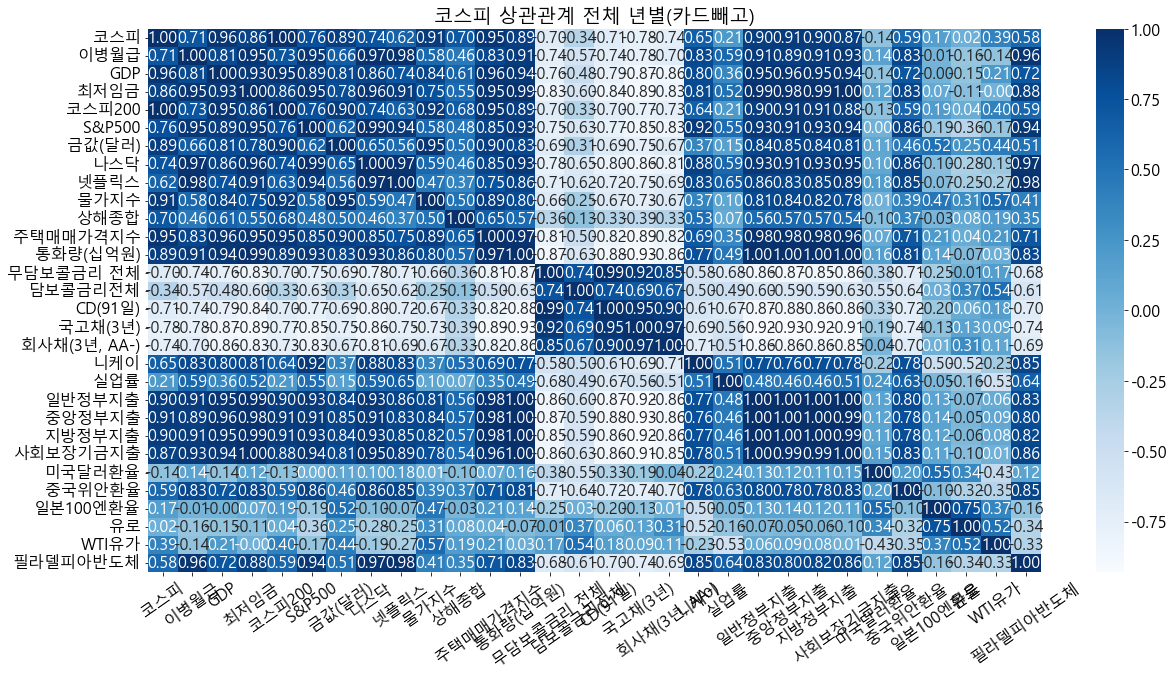

In [ ]:
# 히트맵 그리기
sns.heatmap(data = df2 ,annot = True, fmt='.2f', cmap='Blues')
plt.title('코스피 상관관계 전체 년별(카드빼고)')
plt.xticks(rotation=35)
# plt.savefig('data/Image/코스피상관관계 전체년별4.png')
plt.show()

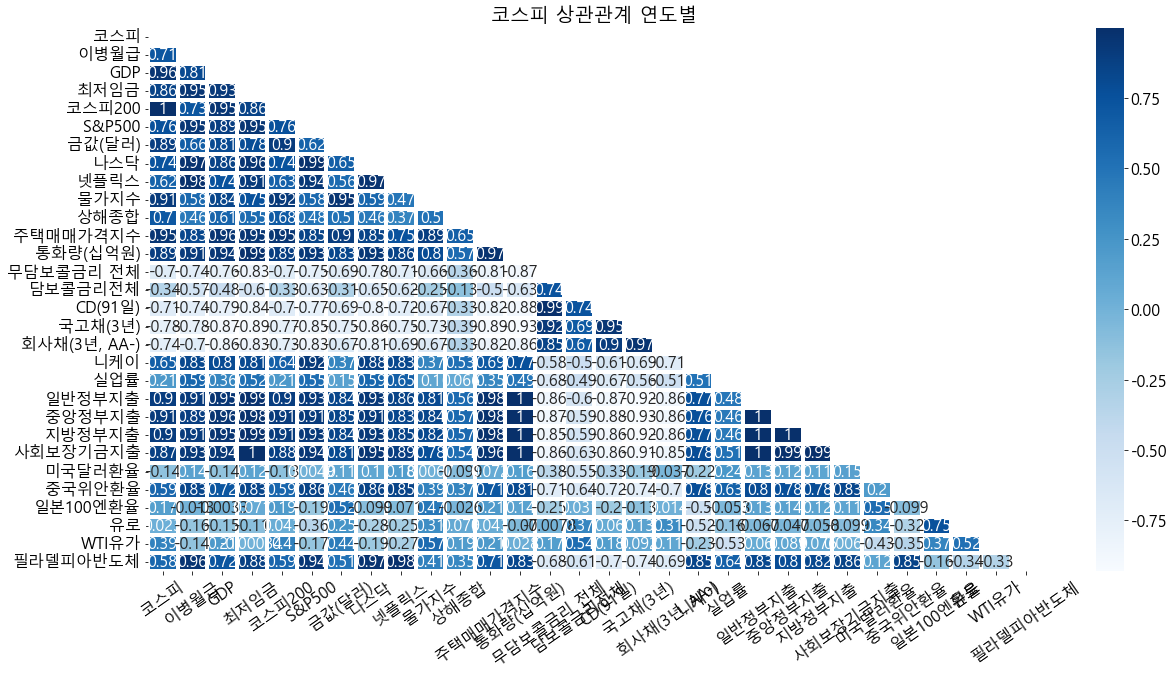

In [ ]:
# 히트맵 그리기
mask = np.zeros_like(df2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.figure(figsize = (15,7))
# sns.heatmap(df2, mask = mask, annot=True, annot_kws=dict(color='r'), linewidths=.5, cmap='Blues')
sns.heatmap(df2, mask = mask, annot=True, linewidths=4, cmap='Blues')
plt.xticks(rotation=35)
plt.title('코스피 상관관계 연도별')
plt.savefig('data/Image/코스피상관관계 전체년별반.png')
plt.show()

In [ ]:
# 저장
# df10.to_csv('./data/코스피상관관계 전체년별.csv', encoding='utf-8-sig')
# df9.to_csv('./data/코스피상관관계 전체년별카드빼고1.csv', encoding='utf-8-sig')